# Análisis de Datos de Misiones Espaciales

## 1. Formulación de Preguntas Clave

### 1.1 ¿Cuáles son las organizaciones con más lanzamientos exitosos?
### 1.2 ¿Cuál es la tendencia de los lanzamientos espaciales a lo largo de los años?
### 1.3 ¿Cuál es el costo promedio de las misiones exitosas en comparación con las fallidas?
### 1.4 ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?
### 1.5 ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?


## 2. Preparación del Entorno de Trabajo en Python

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = 'Misiones espaciales.xlsx'

df = pd.read_excel(path)
df.head()


,Organisation,Country,Location,Year_Complete,Year,Date,Detail,Rocket_Status,Price,Mission_Status
0,RAE,Australia,"LA-5B, RAAF Woomera Range Complex, Australia",1971-01-01,1971.0,"Thu Oct 28, 1971 04:09 UTC",Black Arrow | Prospero,StatusRetired,Unknown,Success
1,RAE,Australia,"LA-5B, RAAF Woomera Range Complex, Australia",1970-01-01,1970.0,"Mon Nov 02, 1970 00:34 UTC",Black Arrow | Orba,StatusRetired,Unknown,Failure
2,CECLES,Australia,"LA-5B, RAAF Woomera Range Complex, Australia",1970-01-01,1970.0,"Fri Jun 12, 1970 06:06 UTC",Europa 1 | STV-3,StatusRetired,Unknown,Failure
3,CECLES,Australia,"LA-5B, RAAF Woomera Range Complex, Australia",1969-01-01,1969.0,"Thu Jul 03, 1969 08:06 UTC",Europa 1 | STV-2,StatusRetired,Unknown,Failure
4,CECLES,Australia,"LA-5B, RAAF Woomera Range Complex, Australia",1968-01-01,1968.0,"Fri Nov 29, 1968 09:47 UTC",Europa 1 | STV-1,StatusRetired,Unknown,Success


## 3. Análisis Exploratorio de Datos (EDA)

In [67]:
#Nombre de columnas


print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

Cantidad de Filas y columnas: (4325, 10)
Nombre columnas: Index(['Organisation', 'Country', 'Location', 'Year_Complete', 'Year', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')


In [68]:
#Información básica del Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Country         4324 non-null   object        
 2   Location        4324 non-null   object        
 3   Year_Complete   4324 non-null   datetime64[ns]
 4   Year            4324 non-null   float64       
 5   Date            4324 non-null   object        
 6   Detail          4324 non-null   object        
 7   Rocket_Status   4324 non-null   object        
 8   Price           4325 non-null   object        
 9   Mission_Status  4324 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 338.0+ KB
None


In [69]:
#Descripción estadística de los datos numéricos

df.describe()

,Year_Complete,Year
count,4324,4324.000000
mean,1987-05-22 08:42:30.971322752,1987.386679
min,1957-01-01 00:00:00,1957.000000
25%,1972-01-01 00:00:00,1972.000000
50%,1984-01-01 00:00:00,1984.000000
75%,2002-01-01 00:00:00,2002.000000
max,2020-01-01 00:00:00,2020.000000
std,NaN,18.072562


In [70]:
# Revisión de valores nulos
print(df.isnull().sum())

Organisation      1
Country           1
Location          1
Year_Complete     1
Year              1
Date              1
Detail            1
Rocket_Status     1
Price             0
Mission_Status    1
dtype: int64


## 4. Responder a las Preguntas Planteadas

### 4.1 ¿Cuáles son las organizaciones con más lanzamientos exitosos?

        Organisation        Country  Successful_Launches
3               CASC          China                  151
16              NASA            USA                  134
23               ULA            USA                   97
22            SpaceX            USA                   93
0        Arianespace         France                   91
18          Northrop            USA                   72
9               ISRO          India                   59
14               MHI          Japan                   37
26           VKS  RF         Russia                   26
24    US  Air  Force            USA                   23
20         Roscosmos     Kazakhstan                   19
6           Eurockot         Russia                   12
11         Kosmotras     Kazakhstan                   11
19       Rocket  Lab   New  Zealand                   11
12         Kosmotras         Russia                   10
8                ILS            USA                    8
13          Lockheed           

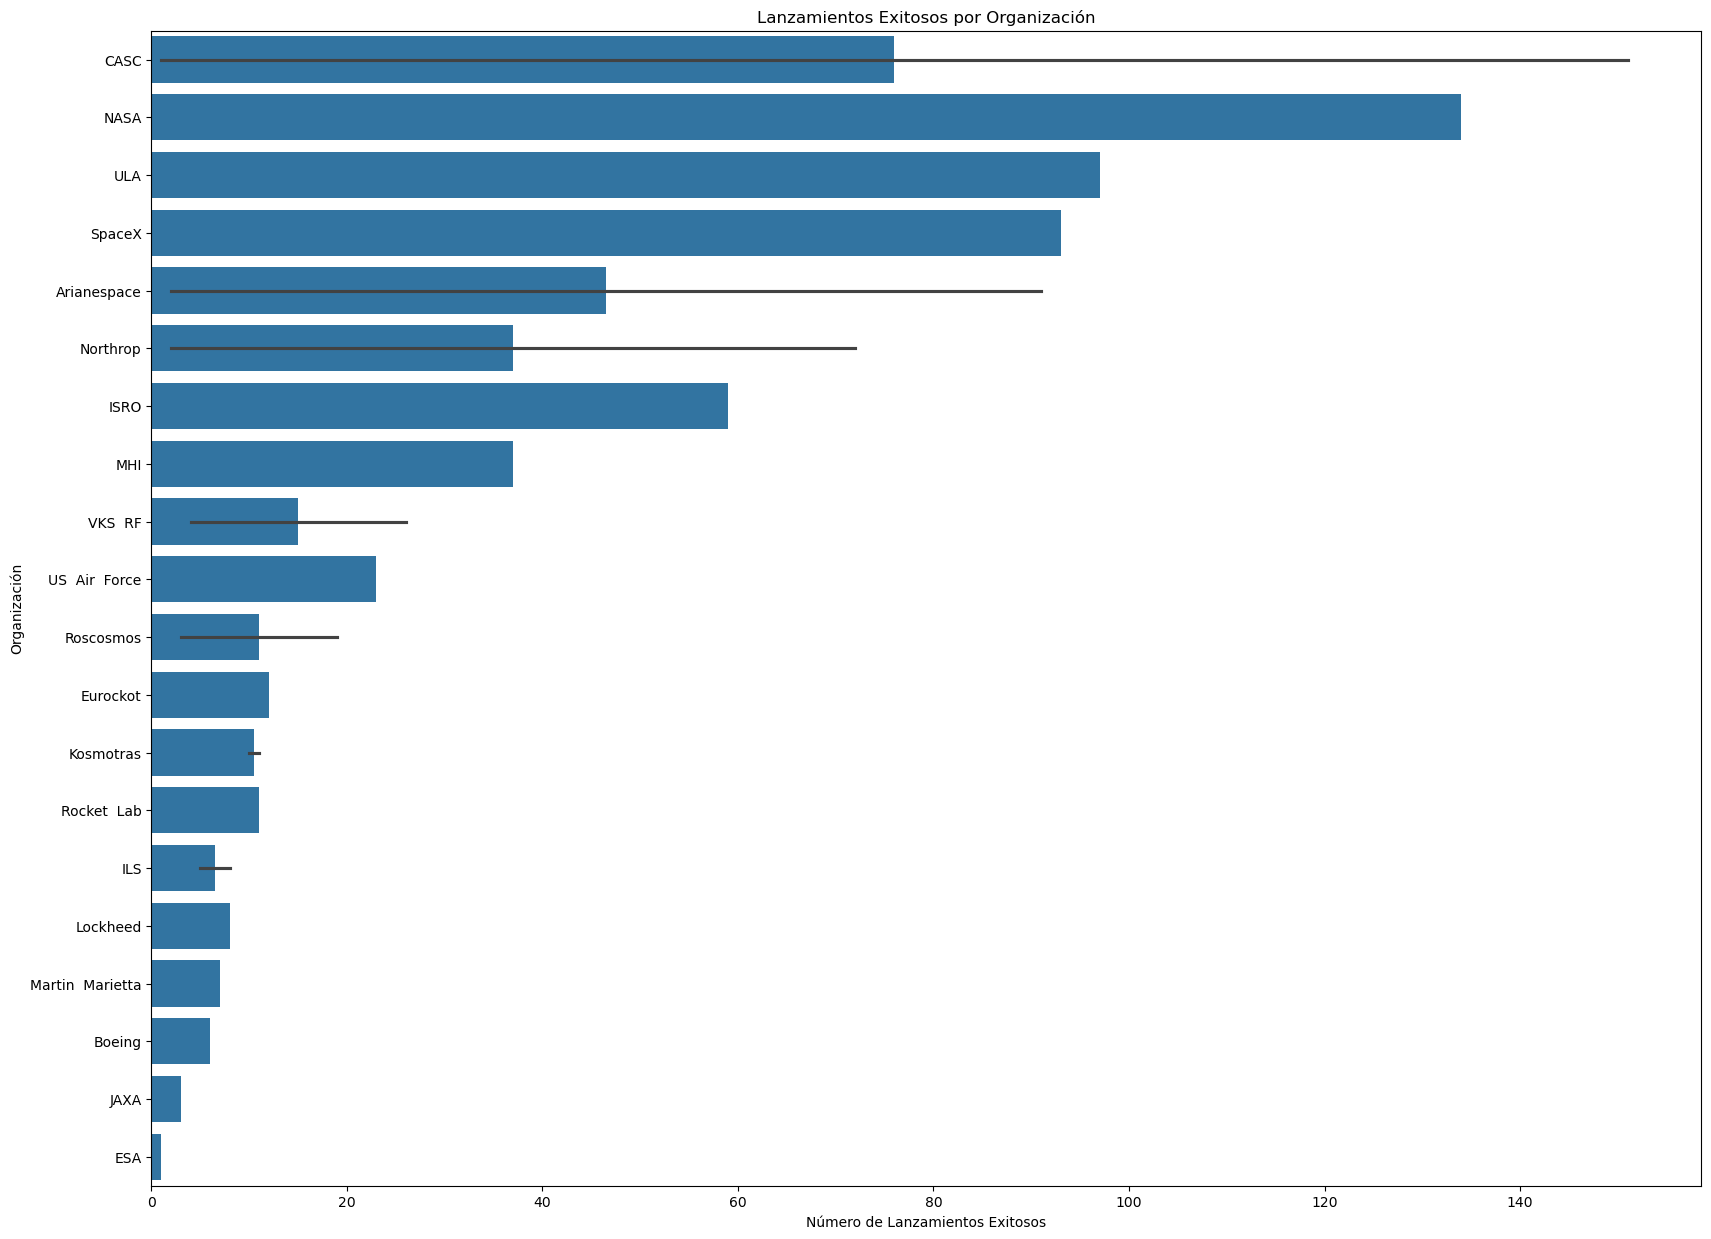

In [136]:
# Asegúrate de que los valores de la columna Mission_Status son correctos
#print(df['Mission_Status'].unique())

#Filtraremos las misiones exitosas

successful_missions= df[df['Mission_Status'] == 'Success']


# Verifica si hay misiones exitosas después del filtrado
if successful_missions.empty:
    print("No se encontraron misiones exitosas en el dataset.")

else:

# Cuenta los lanzamientos por organización y país
    launches_by_organitzation = successful_missions.groupby(['Organisation', 'Country']).size().reset_index(name='Successful_Launches')

    launches_by_organitzation = launches_by_organitzation.sort_values(by='Successful_Launches', ascending=False)

    # Imprime los datos filtrados para verificar
    print(launches_by_organitzation)

        # Visualiza los resultados
    plt.figure(figsize=(20, 15))
    sns.barplot(data=launches_by_organitzation, x='Successful_Launches', y='Organisation')
    plt.title('Lanzamientos Exitosos por Organización')
    plt.xlabel('Número de Lanzamientos Exitosos')
    plt.ylabel('Organización')
    plt.show()

### 4.2 ¿Cuál es la tendencia de los lanzamientos espaciales a lo largo de los años?

   Year_Complete  Launch_Count
63    2020-01-01            63
62    2019-01-01           109
61    2018-01-01           117
60    2017-01-01            92
59    2016-01-01            90
..           ...           ...
4     1961-01-01            52
3     1960-01-01            39
2     1959-01-01            20
1     1958-01-01            28
0     1957-01-01             3

[64 rows x 2 columns]


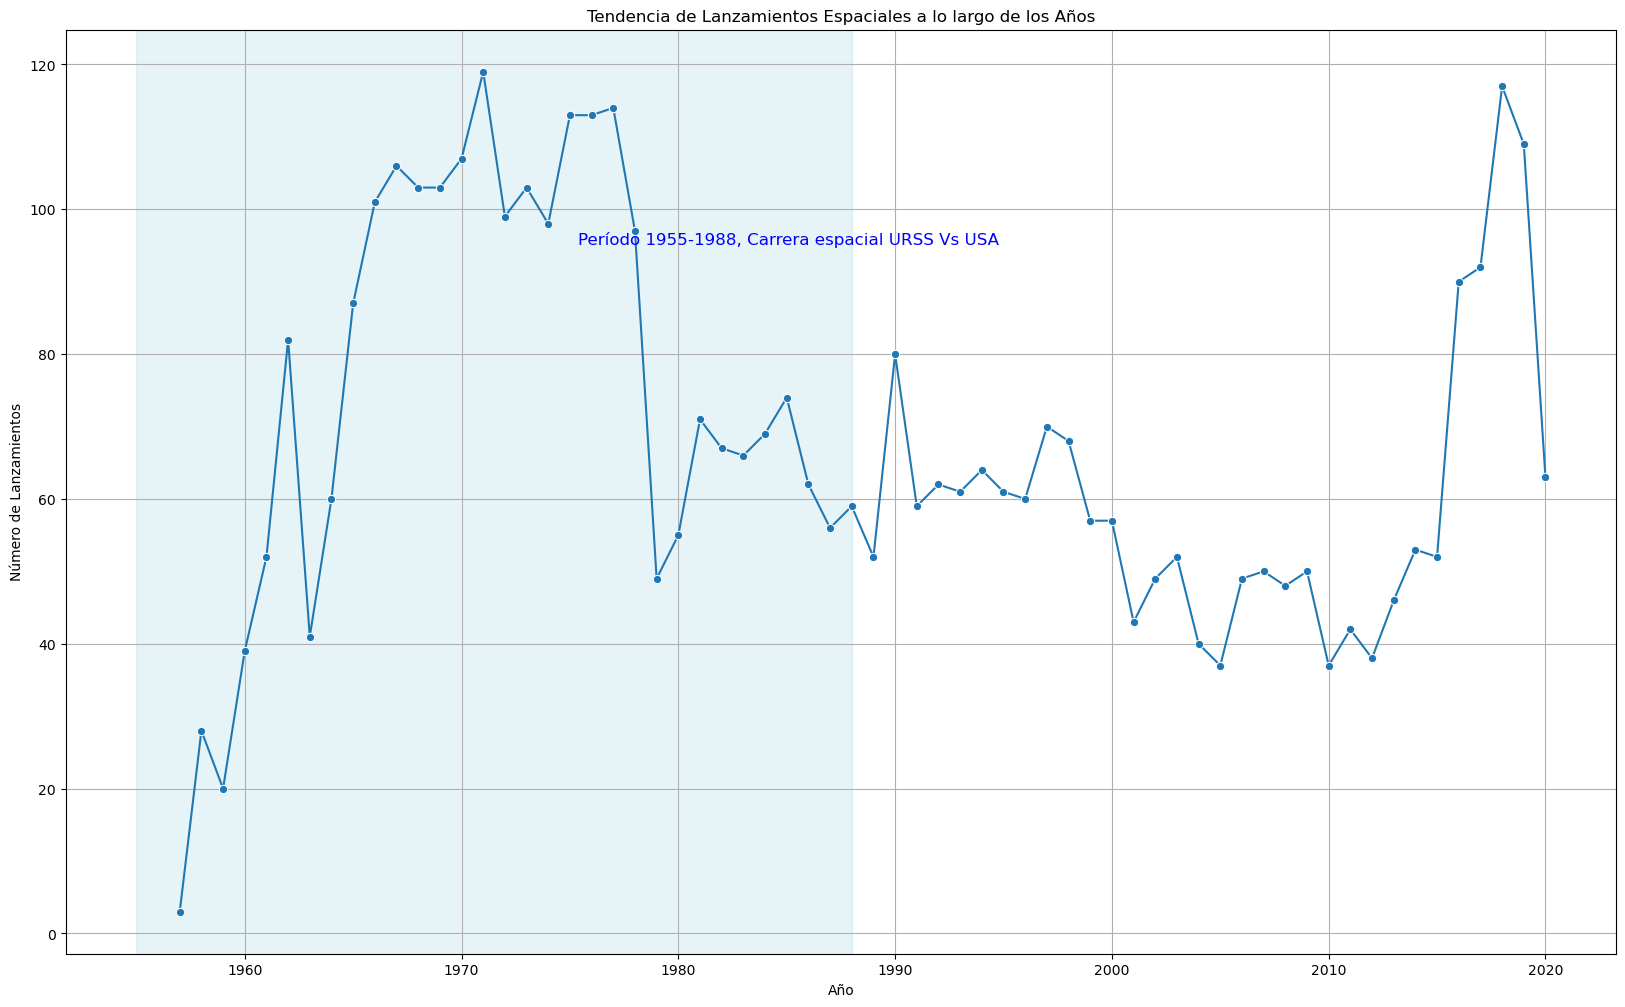

In [99]:
#Cuenta los lanzamientos por año

launches_per_year = df.groupby('Year_Complete').size().reset_index(name= 'Launch_Count')

#Ordenar los años

launches_per_year = launches_per_year.sort_values(by='Year_Complete', ascending = False)

#Imprime los datos

print(launches_per_year)


#Visualiza la tendencia a lo largo de los años

plt.figure(figsize=(20,12))
sns.lineplot(data=launches_per_year, x='Year_Complete', y='Launch_Count',marker = 'o')

# Añade sombreado para resaltar el período 1955-1993
plt.axvspan('1955-01-01','1988-01-01', color='lightblue', alpha=0.3) 


# Añadir una etiqueta para el rango sombreado
plt.text(1960, max(launches_per_year['Launch_Count']) * 0.8, 'Período 1955-1988, Carrera espacial URSS Vs USA', fontsize=12, color='blue')


#Añade detalles gráficos

plt.title('Tendencia de Lanzamientos Espaciales a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Número de Lanzamientos')
plt.grid(True)


plt.show()




### 4.3 ¿Cuál es el costo promedio de las misiones exitosas vs fallidas?

In [105]:

df['Price'] = pd.to_numeric(df.Price, errors='coerce')

# Filtra los datos válidos, es decir, aquellos que tienen un valor numérico en 'Price'
df = df[df['Price'].notnull()]

cost_by_status = df.groupby('Mission_Status')['Price'].sum().reset_index()

cost_by_status.columns = ['Mission_Status','Total_Cost (Milions of $)']

print(cost_by_status)



       Mission_Status  Total_Cost (Milions of $)
0             Failure                    44206.0
1    Partial  Failure                    17673.0
2  Prelaunch  Failure                      620.0
3             Success                  1545699.0


### 4.4 ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?


   Year_Complete     Price
0     1964-01-01   12646.0
1     1965-01-01   12646.0
2     1966-01-01    1770.0
3     1967-01-01    4130.0
4     1968-01-01    4720.0
5     1969-01-01    2360.0
6     1981-01-01    9000.0
7     1982-01-01   13808.0
8     1983-01-01   18308.0
9     1984-01-01   22808.0
10    1985-01-01   40808.0
11    1986-01-01    9308.0
12    1987-01-01     616.0
13    1988-01-01    9658.0
14    1989-01-01   22850.0
15    1990-01-01   31806.0
16    1991-01-01   27400.0
17    1992-01-01   40999.0
18    1993-01-01   33208.0
19    1994-01-01   38119.0
20    1995-01-01   32500.0
21    1996-01-01   36725.0
22    1997-01-01   39913.0
23    1998-01-01   27382.0
24    1999-01-01   29634.0
25    2000-01-01   27699.0
26    2001-01-01   29070.0
27    2002-01-01   43192.0
28    2003-01-01   24601.0
29    2004-01-01   30085.0
30    2005-01-01   19724.0
31    2006-01-01   49066.0
32    2007-01-01   53395.0
33    2008-01-01   57763.0
34    2009-01-01   55889.0
35    2010-01-01   43036.0
3

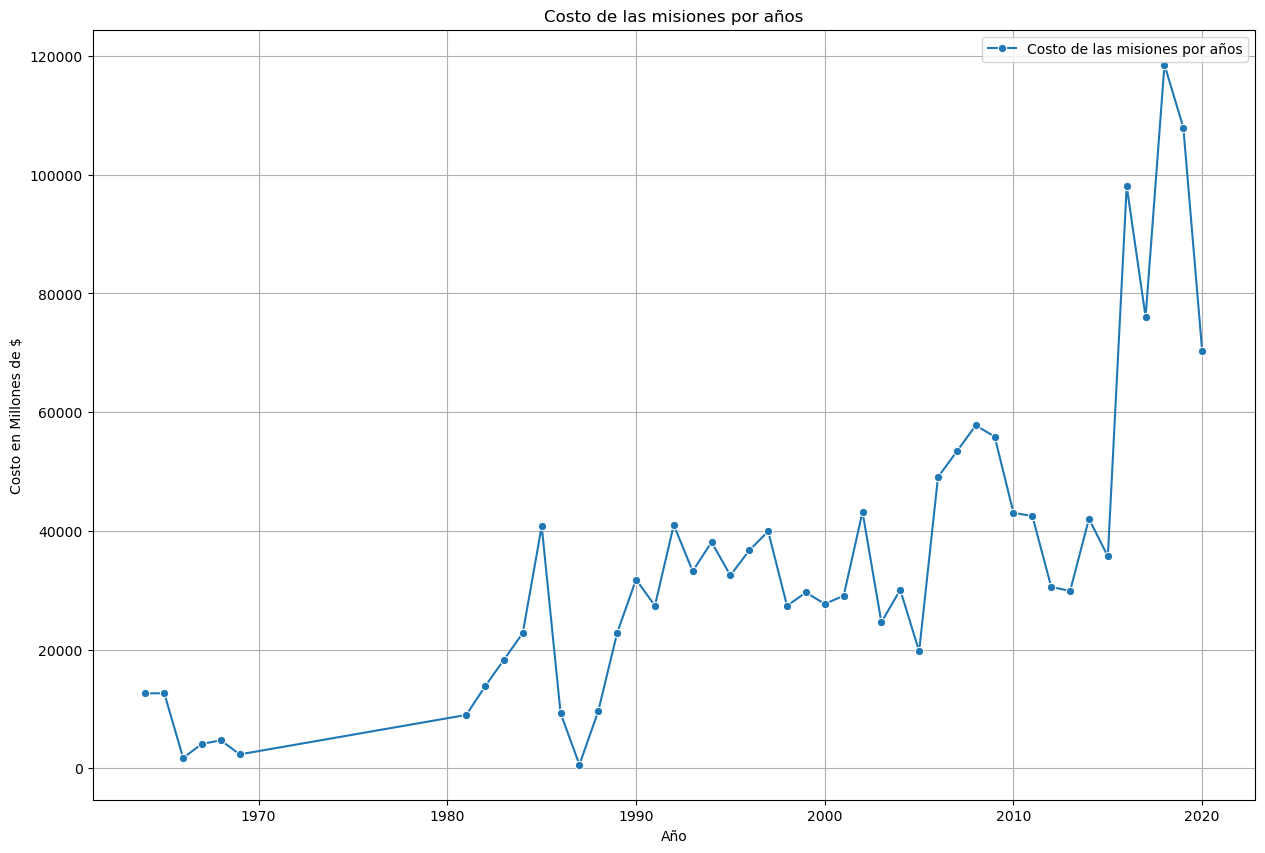

In [131]:

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


df = df[df['Price'].notnull()]


cost_per_year = df.groupby('Year_Complete')['Price'].sum().reset_index()

print(cost_per_year)


plt.figure(figsize=(15, 10))
sns.lineplot(x='Year_Complete', y='Price', data=cost_per_year, label='Costo de las misiones por años',marker='o')

plt.title('Costo de las misiones por años')
plt.xlabel('Año')
plt.ylabel('Costo en Millones de $')
plt.grid(True)
plt.legend()
plt.show()


### 4.5 ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

Mission_Status  Failure  Partial  Failure  Prelaunch  Failure  Success  \
Year_Complete                                                            
1964-01-01            1                 0                   0        1   
1965-01-01            0                 0                   0        2   
1966-01-01            0                 0                   0        3   
1967-01-01            1                 1                   0        5   
1968-01-01            0                 0                   0        8   
1969-01-01            0                 0                   0        4   
1981-01-01            0                 0                   0        2   
1982-01-01            0                 0                   0        4   
1983-01-01            0                 0                   0        5   
1984-01-01            0                 0                   0        6   
1985-01-01            0                 0                   0       10   
1986-01-01            1               

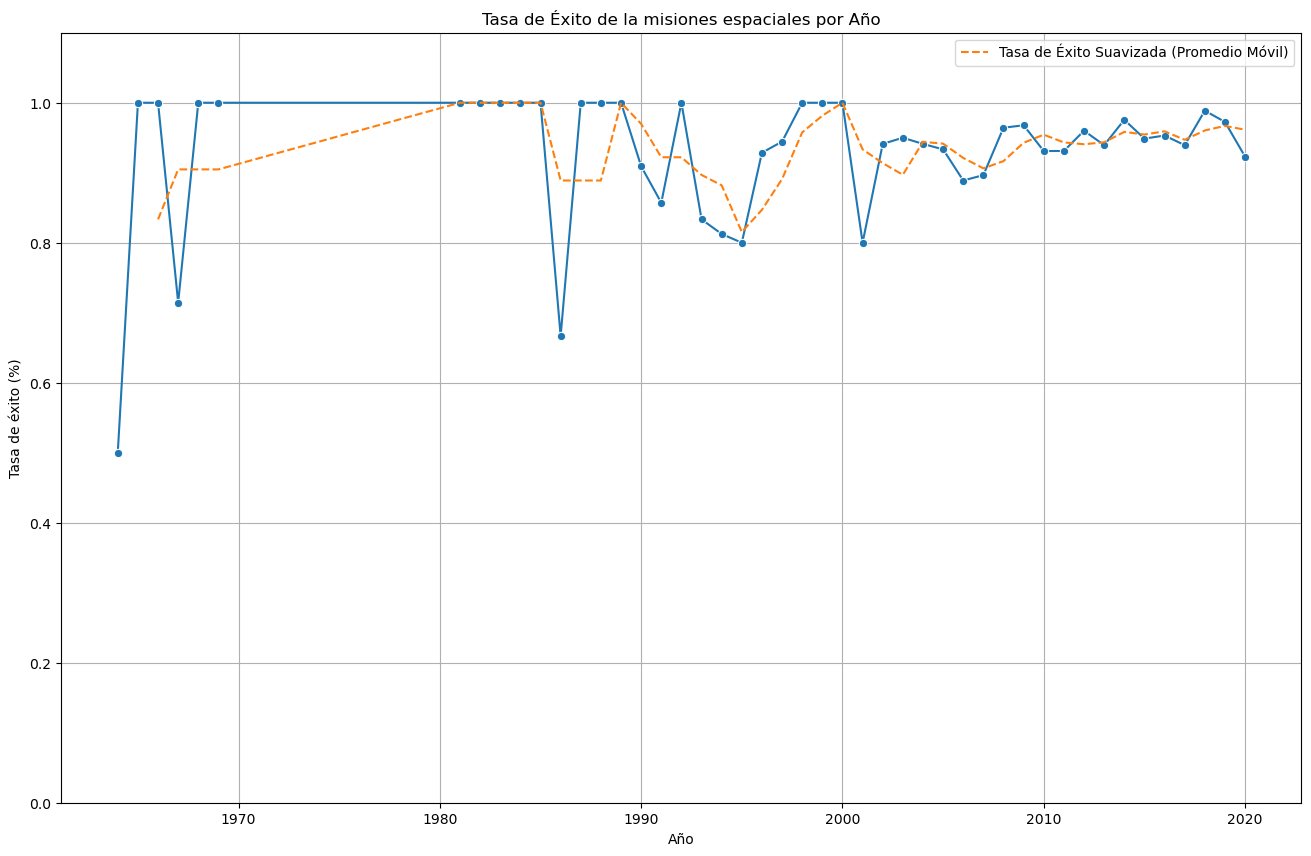

In [126]:




# Agrupa por año y estado de misión para contar cuántas misiones han sido exitosas o fallidas cada año

missions_by_year= df.groupby(['Year_Complete','Mission_Status']).size().unstack(fill_value=0)

#Calcular la tasa de éxito por año

missions_by_year['Total_Missions'] = missions_by_year.sum(axis=1)
missions_by_year['Success_Rate'] = missions_by_year['Success']/missions_by_year['Total_Missions']

# Aplicar un promedio móvil de 5 años a la tasa de éxito para suavizar las fluctuaciones
missions_by_year['Success_Rate_Smoothed'] = missions_by_year['Success_Rate'].rolling(window=3).mean()

print(missions_by_year)

plt.figure(figsize=(16,10))

#Gráfico original sin suavizar
sns.lineplot(x=missions_by_year.index, y=missions_by_year['Success_Rate'], marker='o')

# Gráfico con la tasa de éxito suavizada (promedio móvil)
sns.lineplot(x=missions_by_year.index, y=missions_by_year['Success_Rate_Smoothed'], label='Tasa de Éxito Suavizada (Promedio Móvil)', linestyle='--')


plt.title('Tasa de Éxito de la misiones espaciales por Año')
plt.xlabel('Año')
plt.ylabel('Tasa de éxito (%)')
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()

plt.show()



